# Local Outlier Factor method trained on normalized barrier, distance, chi-1_fa and S-2_fa variables

In [1]:
import matplotlib.pyplot as plt 
import csv 
import pandas as pd 
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns

Read CSV data into panda DataFrame "distance_barrier", print first five rows and plot the data in a scatterplot:

   chi-1_fa   S-2_fa  distance  barrier
0   564.775  72.0370    0.9348     14.8
1   482.135  57.4704    0.9699     12.4
2   670.614  89.7068    0.9983      5.2
3   354.089  49.8734    0.9353     10.5
4   472.145  60.6480    0.9310      9.4


<Axes: xlabel='distance', ylabel='barrier'>

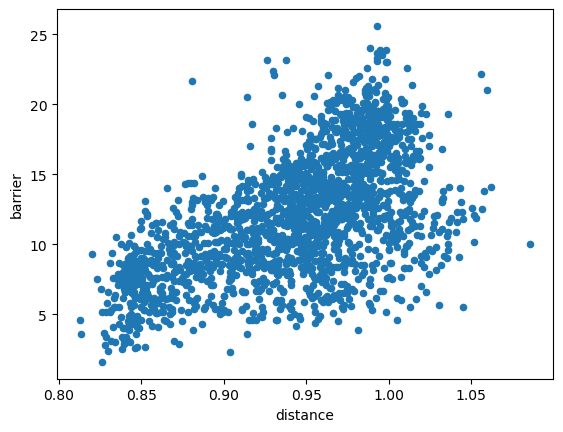

In [2]:
distance_barrier = pd.read_csv("data/vaskas_features_properties_smiles_filenames.csv", usecols=[1, 26, 90, 91])
print(distance_barrier.head())
distance_barrier.plot(kind='scatter', x='distance', y='barrier')

<Axes: xlabel='chi-1_fa', ylabel='barrier'>

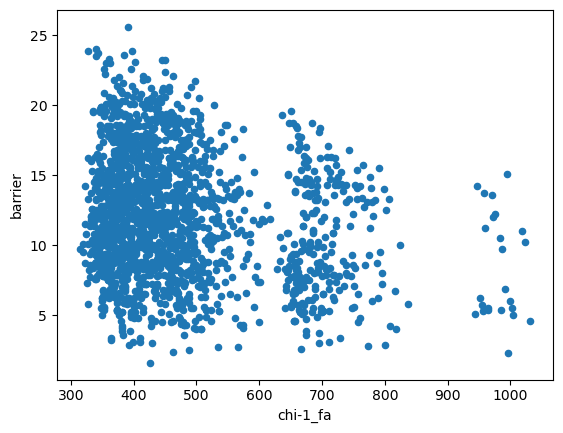

In [3]:
distance_barrier.plot(kind='scatter', x='chi-1_fa', y='barrier')


<Axes: xlabel='S-2_fa', ylabel='barrier'>

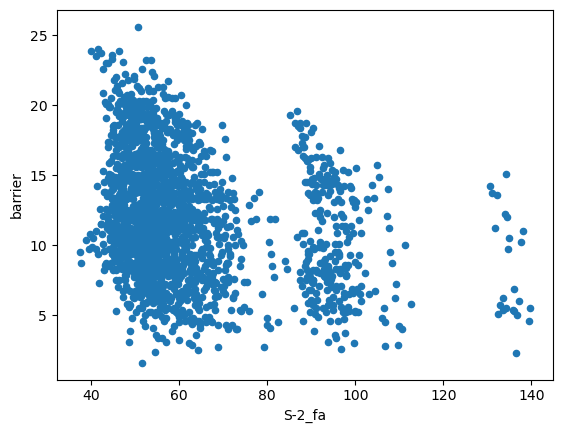

In [4]:
distance_barrier.plot(kind='scatter', x='S-2_fa', y='barrier')

In [5]:
distance_barrier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chi-1_fa  1947 non-null   float64
 1   S-2_fa    1947 non-null   float64
 2   distance  1947 non-null   float64
 3   barrier   1947 non-null   float64
dtypes: float64(4)
memory usage: 61.0 KB


Normalization of entire Data Frame before fitting Local Outlier Factor model:

In [6]:
print(distance_barrier.head())
min_max_scaler = preprocessing.MinMaxScaler()
distance_barrier_scaled = min_max_scaler.fit_transform(distance_barrier)
scaled = pd.DataFrame(distance_barrier_scaled, columns = distance_barrier.columns)
print(scaled.head())

   chi-1_fa   S-2_fa  distance  barrier
0   564.775  72.0370    0.9348     14.8
1   482.135  57.4704    0.9699     12.4
2   670.614  89.7068    0.9983      5.2
3   354.089  49.8734    0.9353     10.5
4   472.145  60.6480    0.9310      9.4
   chi-1_fa    S-2_fa  distance   barrier
0  0.349373  0.338506  0.446964  0.550000
1  0.234254  0.196349  0.575347  0.450000
2  0.496808  0.510948  0.679225  0.150000
3  0.055885  0.122209  0.448793  0.370833
4  0.220338  0.227360  0.433065  0.325000


Define variables for the Local Outlier Factor model and fit it to the data. Set contamination percentage = percentage of outliers. Define anomaly scores (continuous variable) and anomaly score (descrete variable [1, -1]). 

In [7]:
anomaly_inputs = ['distance', 'barrier', 'S-2_fa', 'chi-1_fa']
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
scaled['anomaly'] = lof.fit_predict(distance_barrier[anomaly_inputs])
scaled['anomaly_scores'] = lof.negative_outlier_factor_ * -1

In [8]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   chi-1_fa        1947 non-null   float64
 1   S-2_fa          1947 non-null   float64
 2   distance        1947 non-null   float64
 3   barrier         1947 non-null   float64
 4   anomaly         1947 non-null   int32  
 5   anomaly_scores  1947 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 83.8 KB


In [9]:
scaled.loc[:, ['distance', 'barrier', 'chi-1_fa', 'S-2_fa', 'anomaly_scores', 'anomaly'] ]

,distance,barrier,chi-1_fa,S-2_fa,anomaly_scores,anomaly
0,0.446964,0.550000,0.349373,0.338506,0.991966,1
1,0.575347,0.450000,0.234254,0.196349,0.964802,1
2,0.679225,0.150000,0.496808,0.510948,1.016066,1
3,0.448793,0.370833,0.055885,0.122209,0.963036,1
4,0.433065,0.325000,0.220338,0.227360,0.991203,1
...,...,...,...,...,...,...
1942,0.478786,0.554167,0.236717,0.253411,1.020378,1
1943,0.567301,0.504167,0.109578,0.169157,1.024864,1
1944,0.460132,0.583333,0.505262,0.511336,1.009363,1
1945,0.566203,0.479167,0.591225,0.563670,1.018966,1


Define a function with Seaborn to plot outliers and inliers in scatterplots, where the anomaly_score is color coded. 

In [10]:
def outlier_plot(data, outlier_method_name, x_var, y_var, h_var, s_var, xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name} (normalized: distance vs barrier vs chi-1_fa vs S-2_fa)')

    method = f'{outlier_method_name}_anomaly'

    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values {len(data[data['anomaly']==1])}")
    print(f"Total number of values: {len(data)}")

    g = sns.relplot(data=data, x=x_var, y=y_var, col='anomaly', hue=h_var, size=s_var) 
    g.fig.suptitle(f'Outlier method: {outlier_method_name} (normalized: distance vs barrier vs chi-1_fa vs S-2_fa)', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n{len(data[data['anomaly']== 1])} points")
    return g
    
    

Outlier Method: Local Outlier Factor (normalized: distance vs barrier vs chi-1_fa vs S-2_fa)
Number of anomalous values 20
Number of non anomalous values 1927
Total number of values: 1947


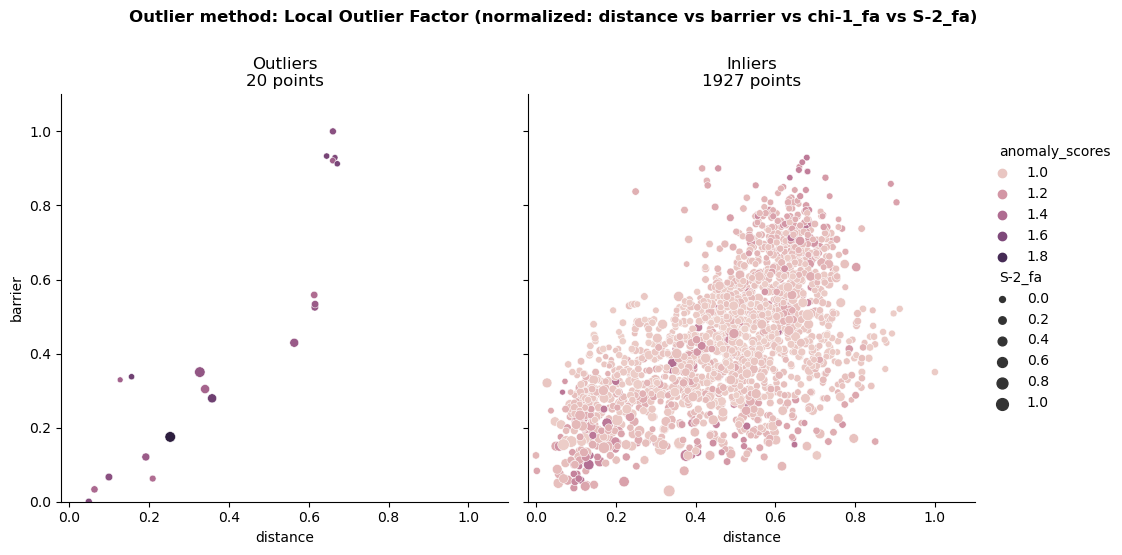

In [11]:
outlier_plot(scaled, "Local Outlier Factor", "distance", "barrier", "anomaly_scores", "S-2_fa", [-0.02, 1.1], [0, 1.1])

Outlier Method: Local Outlier Factor (normalized: distance vs barrier vs chi-1_fa vs S-2_fa)
Number of anomalous values 20
Number of non anomalous values 1927
Total number of values: 1947


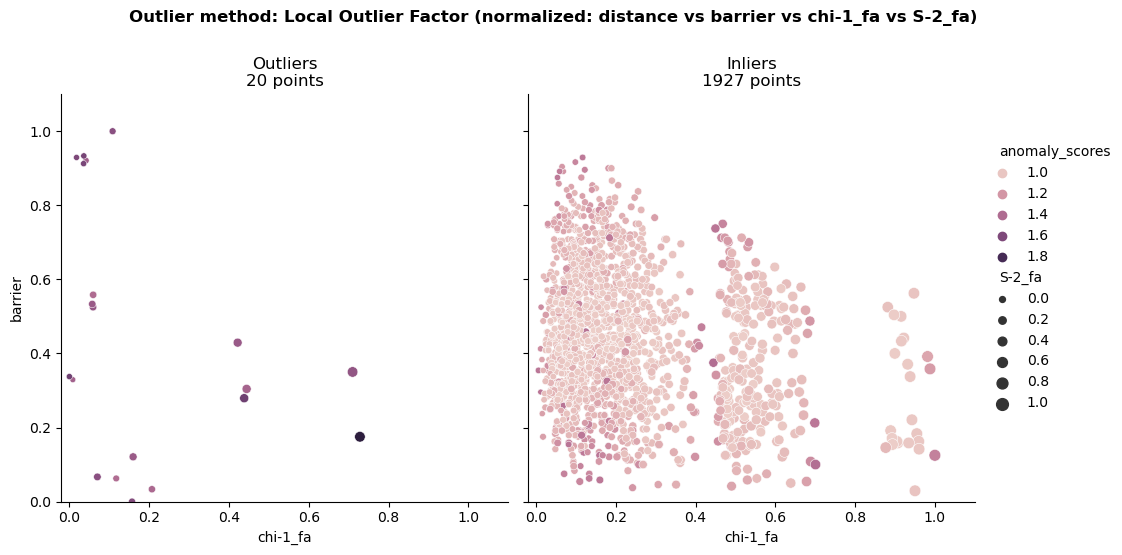

In [12]:
outlier_plot(scaled, "Local Outlier Factor", "chi-1_fa", "barrier", "anomaly_scores", "S-2_fa", [-0.02, 1.1], [0, 1.1])

Outlier Method: Local Outlier Factor (normalized: distance vs barrier vs chi-1_fa vs S-2_fa)
Number of anomalous values 20
Number of non anomalous values 1927
Total number of values: 1947


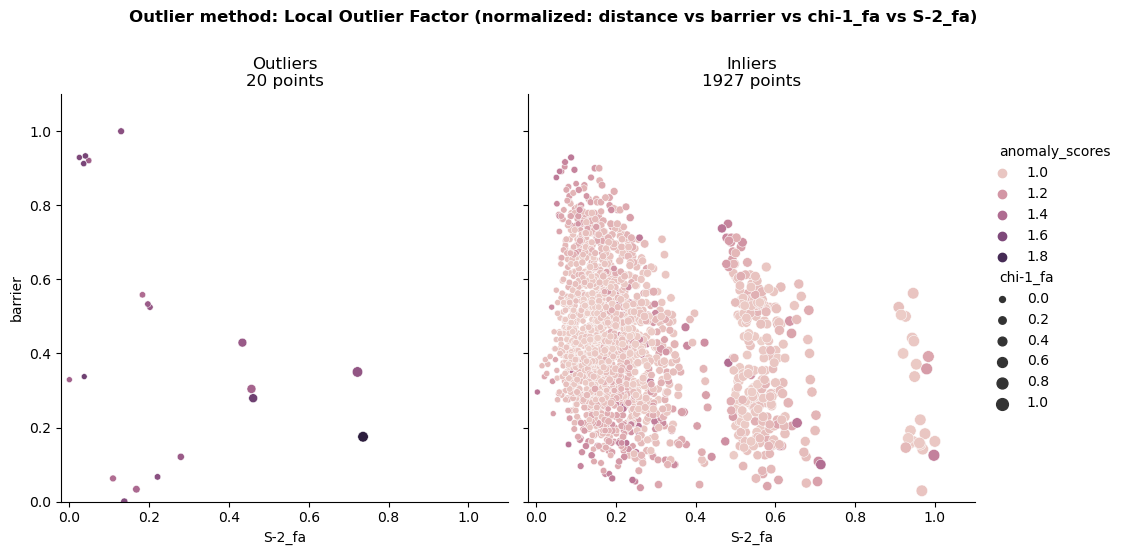

In [13]:
outlier_plot(scaled, "Local Outlier Factor", "S-2_fa", "barrier", "anomaly_scores", "chi-1_fa", [-0.02, 1.1], [0, 1.1])

The suitability of the outlier method is clearly sensitive to the underlying data-distribution. The Local Outlier Factor seems to tackle clustered data distributions better than the Isolation Forest model. The Local Outlier Factor model is based on k nearest neightbor distance metric. However, when fitted to a multidimensional data, some vectors (chi-1_fa and S-2_fa) seem to influence the anomaly score more than others (distance). These plots also show the co-correlation between the chi1_fa and S2_fa variables. Here the different vectors markdown *are* normalized, but it does not change the identified outliers compared with the non-normalized data (suggesting also the LOF method automatically normalizes vector lengths). Pre-print with extensive benchmark of outlier method on different datasets:  https://arxiv.org/abs/2305.00735 